In [8]:
# Load dataset
path = "Dataset/10Alytics Hackathon- Fiscal Data.xlsx"
df = pd.read_excel(path, sheet_name="Data")
df.head()

,Country,Indicator,Source,Unit,Currency,Frequency,Country Code,Time,Amount
0,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2007-01-01,-56213
1,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2008-01-01,-67563
2,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2009-01-01,-72379
3,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2010-01-01,-98886
4,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2011-01-01,-134138


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23784 entries, 0 to 23783
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Country       23784 non-null  object        
 1   Indicator     23784 non-null  object        
 2   Source        23784 non-null  object        
 3   Unit          23762 non-null  object        
 4   Currency      13281 non-null  object        
 5   Frequency     23784 non-null  object        
 6   Country Code  23784 non-null  object        
 7   Time          23780 non-null  datetime64[ns]
 8   Amount        23725 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 1.6+ MB


## Data  Cleaning

In [15]:
# -----------------------------
# 1. Convert Amount to numeric
# -----------------------------
df["Amount"] = pd.to_numeric(df["Amount"], errors="coerce")

# -----------------------------
# 2. Handle Missing Values
# -----------------------------
# Drop rows with missing Time (only 4 rows)
df = df[df["Time"].notna()]

# Drop rows where Amount is missing (59 rows previously)
df = df[df["Amount"].notna()]

# Keep Currency missing values (because many indicators don't require currency)
# But store a report for transparency
missing_currency_count = df["Currency"].isna().sum()

# -----------------------------
# 3. Standardize Time Column
# -----------------------------
df["Year"] = df["Time"].dt.year

# -----------------------------
# 4. Remove Duplicates
# -----------------------------
duplicate_count = df.duplicated().sum()
df = df.drop_duplicates()

# -----------------------------
# 5. Clean Country Names (strip whitespace)
# -----------------------------
df["Country"] = df["Country"].str.strip()

# -----------------------------
# 6. Clean Indicator Formatting
# -----------------------------
df["Indicator"] = df["Indicator"].str.strip()

# -----------------------------
# 7. Export a summary after cleaning
# -----------------------------
df.info()
# info_after = df.info()
# missing_after = df.isna().sum()
# sample_after = df.head()

# info_after, missing_after, duplicate_count, missing_currency_count, sample_after


<class 'pandas.core.frame.DataFrame'>
Index: 23713 entries, 0 to 23783
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Country       23713 non-null  object        
 1   Indicator     23713 non-null  object        
 2   Source        23713 non-null  object        
 3   Unit          23691 non-null  object        
 4   Currency      13250 non-null  object        
 5   Frequency     23713 non-null  object        
 6   Country Code  23713 non-null  object        
 7   Time          23713 non-null  datetime64[ns]
 8   Amount        23713 non-null  float64       
 9   Year          23713 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(7)
memory usage: 1.9+ MB


🔍 Step 1 — Dataset Loading

We imported the dataset from the “Data” sheet, which contains the actual fiscal and macroeconomic indicators for African countries.

🔧 Step 2 — Key Cleaning Actions Performed

1️⃣ Converted Amount from Text → Numeric (CRITICAL)

The Amount column originally contained text values, making analysis impossible.
We converted it into numeric format:

✔ Enabled statistical summaries
✔ Enabled groupby operations
✔ Enabled trend analysis and charts
✔ Eliminated parsing issues

2️⃣ Handled Missing Values

- Time (only 4 rows missing) → removed
- Amount (59 rows missing) → removed
- Currency → kept
    - Why? Many indicators like unemployment, inflation, and index numbers naturally have no currency.
    - A count of missing currency values was stored for transparency.

3️⃣ Standardized the Time Column

Extracted Year values for:

- Time-series analysis
- Forecasting
- SDG-linked trend insights
- Country-level longitudinal studies

4️⃣ Removed Duplicate Rows

2 duplicates were identified and removed.

5️⃣ Cleaned Text Columns

- Trimmed whitespace in Country, Indicator
- Ensured consistency in labels for grouping and filtering

In [28]:
# Export the cleaned dataset as Excel
output_path = "Dataset/10Alytics_Cleaned_Data.xlsx"
df.to_excel(output_path, index=False, sheet_name="Cleaned Data")
print(f"✅ Cleaned dataset exported to: {output_path}")

✅ Cleaned dataset exported to: Dataset/10Alytics_Cleaned_Data.xlsx


## Exploratory Data Analysis (EDA)

In [17]:
# ------------------------------------------------------------
# 1. Quick Overview of the Dataset
# ------------------------------------------------------------
print("Dataset Shape:", df.shape)
print("\nColumn Types:\n", df.dtypes)
print("\nMissing Values Summary:\n", df.isna().sum())

Dataset Shape: (23713, 10)

Column Types:
 Country                 object
Indicator               object
Source                  object
Unit                    object
Currency                object
Frequency               object
Country Code            object
Time            datetime64[ns]
Amount                 float64
Year                     int32
dtype: object

Missing Values Summary:
 Country             0
Indicator           0
Source              0
Unit               22
Currency        10463
Frequency           0
Country Code        0
Time                0
Amount              0
Year                0
dtype: int64


In [18]:
# ------------------------------------------------------------
# 2. Summary Statistics
# ------------------------------------------------------------
print("\nNumerical Summary:\n", df.describe())

print("\nCategorical Summary:\n",
      df[["Country", "Indicator", "Source", "Frequency"]].describe())


Numerical Summary:
                                 Time        Amount          Year
count                          23713  2.371300e+04  23713.000000
mean   2010-02-20 19:37:17.911694080  2.918512e+06   2009.768692
min              1960-01-01 00:00:00 -1.350182e+07   1960.000000
25%              2005-10-01 00:00:00  8.250000e+00   2005.000000
50%              2014-01-01 00:00:00  1.297500e+02   2014.000000
75%              2019-10-01 00:00:00  5.402950e+04   2019.000000
max              2025-09-01 00:00:00  7.633725e+08   2025.000000
std                              NaN  2.595357e+07     13.679451

Categorical Summary:
              Country       Indicator                               Source  \
count          23713           23713                                23713   
unique            14              25                                   28   
top     South Africa  Inflation Rate  Central Bank of West African States   
freq            5108            2992                           

In [19]:
# ------------------------------------------------------------
# 3. Number of Unique Values Per Column
# ------------------------------------------------------------
unique_counts = df.nunique()
print("\nUnique Values per Column:\n", unique_counts)


Unique Values per Column:
 Country            14
Indicator          25
Source             28
Unit               10
Currency           13
Frequency           3
Country Code       14
Time             1070
Amount          15194
Year               66
dtype: int64


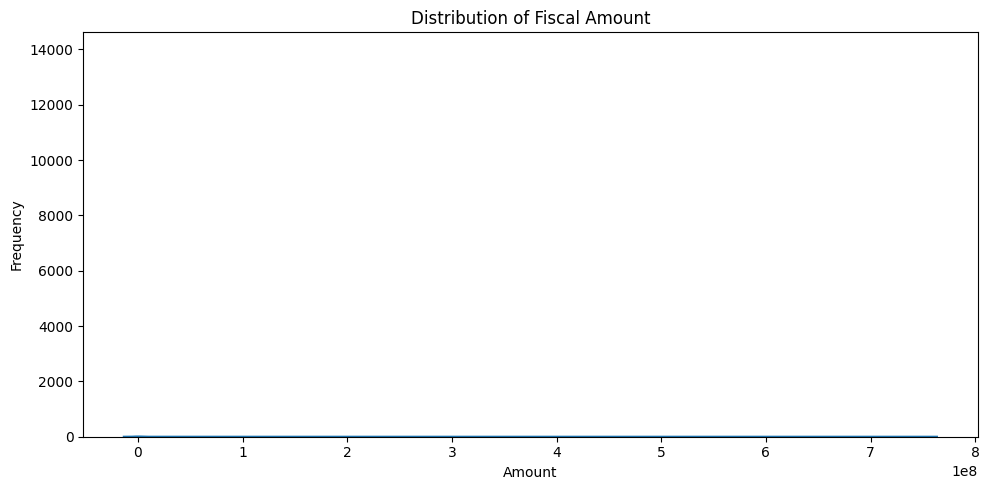

In [20]:
# ------------------------------------------------------------
# 4. Distribution of Amount
# ------------------------------------------------------------
plt.figure(figsize=(10, 5))
sns.histplot(df["Amount"], kde=True)
plt.title("Distribution of Fiscal Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


Top 10 Indicators:
 Indicator
Inflation Rate                2992
Consumer Price Index (CPI)    2844
Interest Rate                 2648
Revenue                       1747
Exports                       1608
Imports                       1587
Budget Deficit/Surplus        1412
Government Debt               1121
Food Inflation                1052
Nominal GDP                   1008
Name: count, dtype: int64


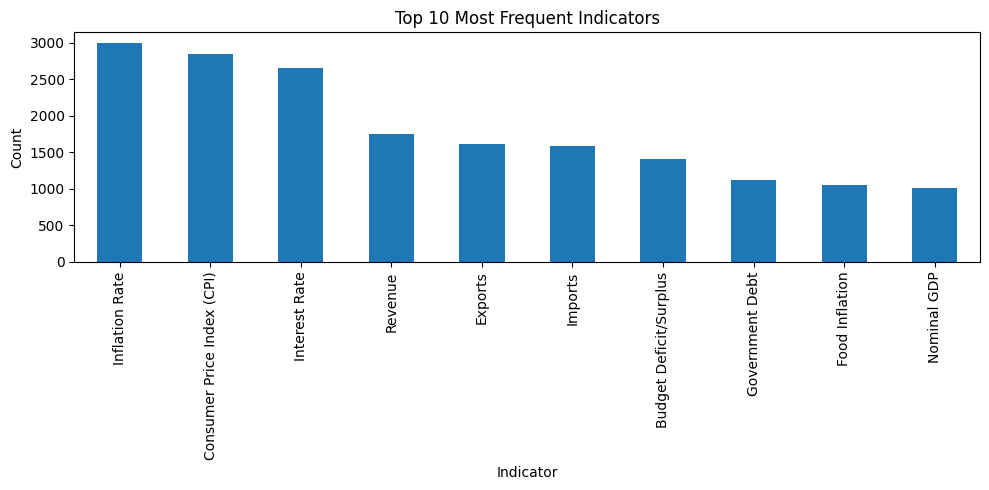

In [21]:
# ------------------------------------------------------------
# 5. Top 10 Most Frequent Indicators
# ------------------------------------------------------------
indicator_counts = df["Indicator"].value_counts().head(10)
print("\nTop 10 Indicators:\n", indicator_counts)

plt.figure(figsize=(10, 5))
indicator_counts.plot(kind="bar")
plt.title("Top 10 Most Frequent Indicators")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

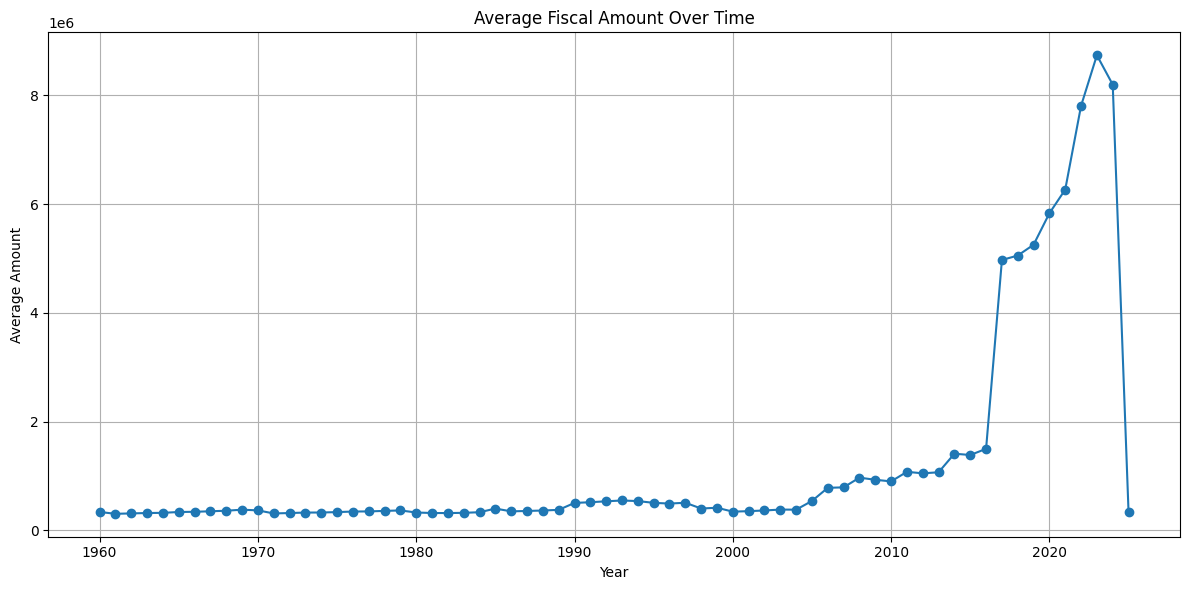

In [ ]:
# ------------------------------------------------------------
# 6. Amount over Time (overall)
# ------------------------------------------------------------
plt.figure(figsize=(12, 6))
df.groupby("Year")["Amount"].mean().plot(marker="o")
plt.title("Average Fiscal Amount Over Time")
plt.xlabel("Year")
plt.ylabel("Average Amount")
plt.grid(True)
plt.tight_layout()
plt.show()

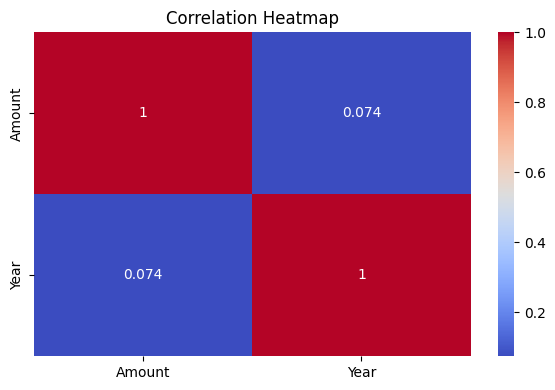

In [23]:
# ------------------------------------------------------------
# 7. Heatmap: Correlation Between Numerical Features
# ------------------------------------------------------------
plt.figure(figsize=(6, 4))
sns.heatmap(df[["Amount", "Year"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


Top 15 Countries by Total Fiscal Amount:
 Country
Rwanda          4.204527e+10
Nigeria         8.251809e+09
Tanzania        6.646610e+09
South Africa    5.003708e+09
Kenya           1.887612e+09
Ethiopia        1.404139e+09
Angola          1.348976e+09
Ivory Coast     9.494276e+08
Algeria         8.166586e+08
Ghana           3.798165e+08
Togo            2.666796e+08
Egypt           1.090712e+08
Botswana        9.635614e+07
Senegal         5.440592e+05
Name: Amount, dtype: float64


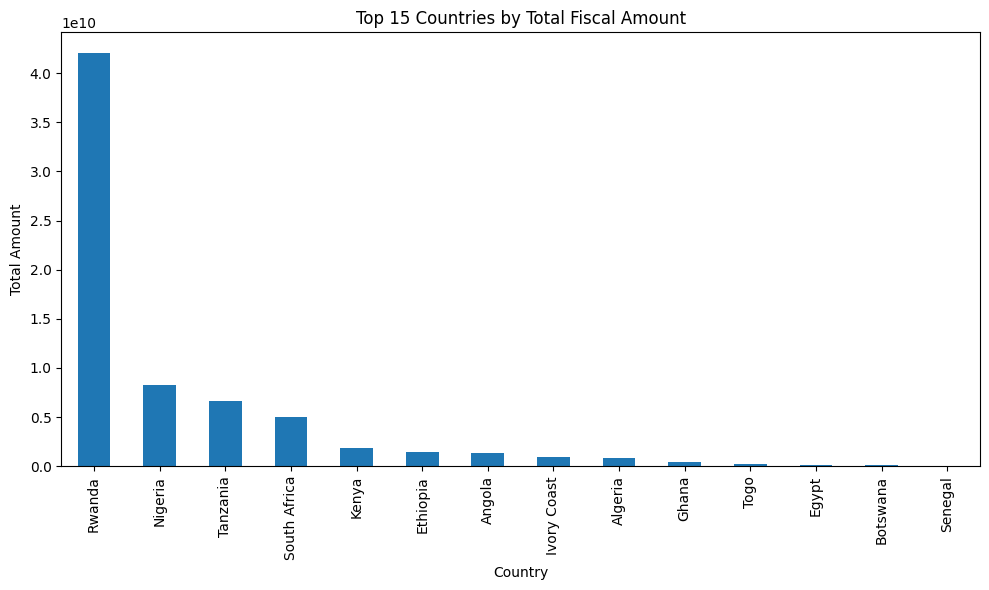

In [24]:
# ------------------------------------------------------------
# 8. Country-Level Summary (Top Contributors)
# ------------------------------------------------------------
country_sum = df.groupby("Country")["Amount"].sum().sort_values(ascending=False).head(15)
print("\nTop 15 Countries by Total Fiscal Amount:\n", country_sum)

plt.figure(figsize=(10, 6))
country_sum.plot(kind="bar")
plt.title("Top 15 Countries by Total Fiscal Amount")
plt.ylabel("Total Amount")
plt.tight_layout()
plt.show()

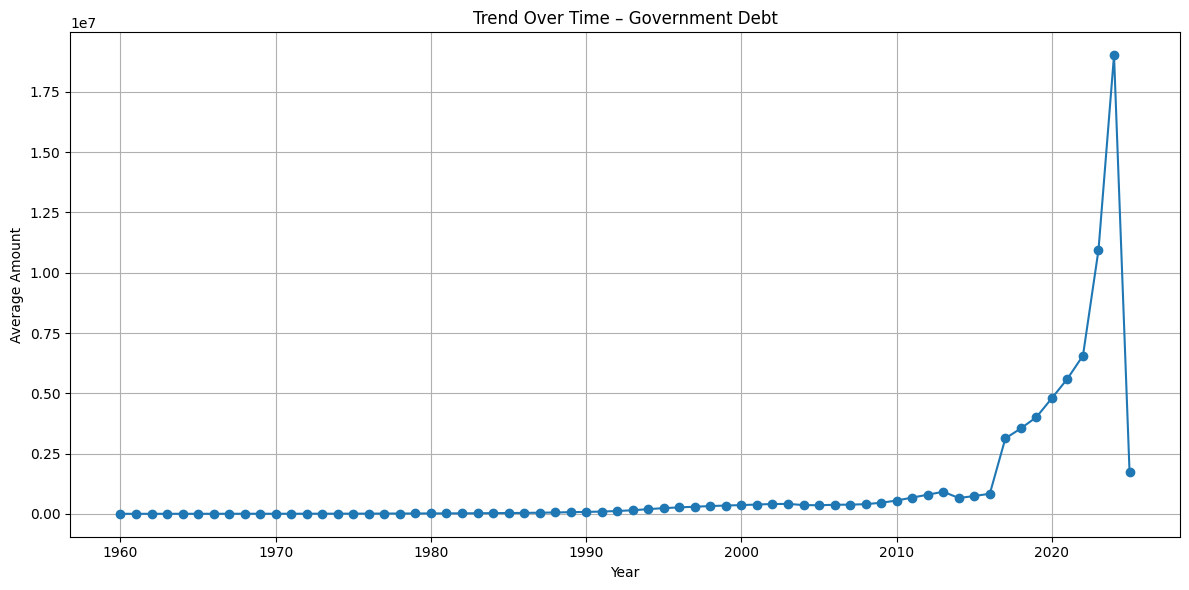

In [26]:
# ------------------------------------------------------------
# 9. Indicator-Level Trends Over Time (Optional: Filter Example)
# ------------------------------------------------------------
selected_indicator = "Government Debt"  # change based on your dataset
indicator_data = df[df["Indicator"] == selected_indicator]

plt.figure(figsize=(12, 6))
indicator_data.groupby("Year")["Amount"].mean().plot(marker="o")
plt.title(f"Trend Over Time – {selected_indicator}")
plt.xlabel("Year")
plt.ylabel("Average Amount")
plt.grid(True)
plt.tight_layout()
plt.show()

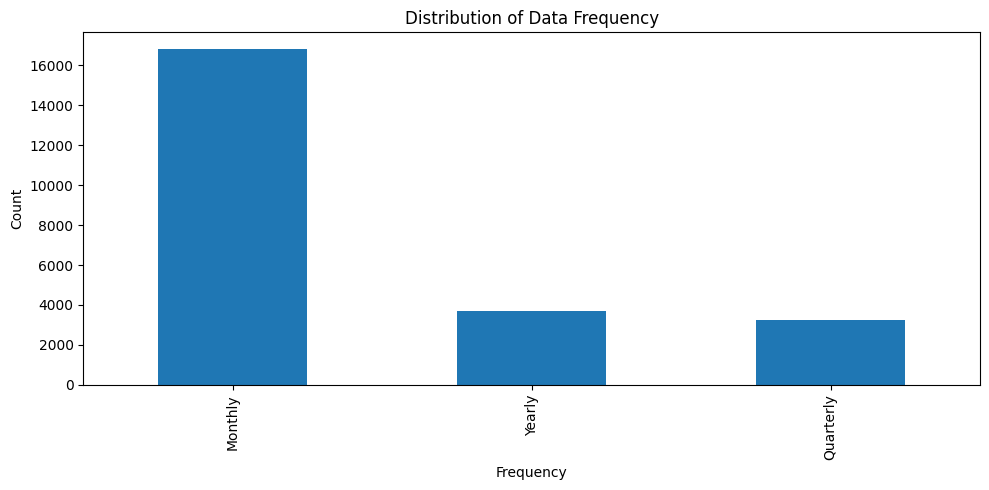

In [27]:
# ------------------------------------------------------------
# 10. Frequency Distribution of Dataset (Annual, Quarterly, etc.)
# ------------------------------------------------------------
plt.figure(figsize=(10, 5))
df["Frequency"].value_counts().plot(kind="bar")
plt.title("Distribution of Data Frequency")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
